In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

main_dir = '/Users/mathieuleverge/git/chain_lumen/'
data_dir = '_data/hydrosmotic_hydraulic/N100/chi50'
folder = os.path.join(main_dir, data_dir)

In [2]:
def batch_window(data, wmin, wmax, nwindow) :
    window = np.logspace(wmin, wmax, nwindow)
    time = np.cumsum(window)
    batch = []
    for i in range(len(time)) :
        indices = np.argwhere(np.abs(data[:, 0] - time[i]) <= window[i])[:, 0]
        batch += [data[indices]]
    return batch    

def batch_average(batchlist) :
    B_avg = []
    B_std = []

    for i in range(len(batchlist[0])) :
        Lavg = []
        Lstd = []
        for b in batchlist :
            Lavg += [np.average(b[i], axis=0)]
            Lstd += [np.std(b[i], axis=0)]
    
        tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
        navg = np.nanmean([Lavg[j][1] for j in range(len(Lavg))])
        
        tstd = np.nanstd([Lstd[j][0] for j in range(len(Lstd))])
        nstd = np.nanstd([Lstd[j][1] for j in range(len(Lstd))])
        
        B_avg += [[tavg, navg]]
        B_std += [[tstd, nstd]]
        
    B_avg = np.array(B_avg)
    B_std = np.array(B_std)
    
    return B_avg, B_std

def batch(data_dict, wmin, wmax, nwindow) :
    window = np.logspace(wmin, wmax, nwindow)
    time = np.cumsum(window)
    dat_batch_list = []
    for k in data_dict.keys() :
        dat_batch_list += [batch_window(data_dict[k], wmin=wmin, wmax=wmax, nwindow=nwindow)]
        print(k, end='\r')
    print('End of import !')
    B_avg, B_std = batch_average(dat_batch_list)
    return B_avg, B_std



In [3]:
dat50 = {}

for elem in os.listdir(folder) :
    if elem != '.DS_Store' and elem.startswith('N100_') :
        print(elem[-2:], end='\r')
        dat50[elem[-2:]] = np.loadtxt(os.path.join(folder, elem, 'sim_nlum.dat'))
        #nmax = np.max([nmax, len(dat[elem[-2:]])])
print('End of import !')


End of import !


In [4]:
dat5 = {}

for elem in os.listdir(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N100/chi5')) :
    if elem != '.DS_Store' and elem.startswith('N100_') :
        print(elem[-2:], end='\r')
        dat5[elem[-2:]] = np.loadtxt(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N100/chi5', elem, 'sim_nlum.dat'))
        #nmax = np.max([nmax, len(dat[elem[-2:]])])
print('End of import !')




End of import !


In [5]:
dat500 = {}

for elem in os.listdir(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N100/chi500')) :
    if elem != '.DS_Store' and elem.startswith('N100_') :
        print(elem[-2:], end='\r')
        dat500[elem[-2:]] = np.loadtxt(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N100/chi500', elem, 'sim_nlum.dat'))
        #nmax = np.max([nmax, len(dat[elem[-2:]])])
print('End of import !')



End of import !


In [6]:
dat1000 = {}

for elem in os.listdir(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N1000/chi50')) :
    if elem != '.DS_Store' and elem.startswith('sim_nlum') :
        print(elem[-5], end='\r')
        dat1000[elem[-5]] = np.loadtxt(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N1000/chi50', elem))
        #nmax = np.max([nmax, len(dat[elem[-2:]])])
print('End of import !')



End of import !


In [7]:
dat1000_indiv = np.loadtxt(os.path.join(main_dir, '_data/hydrosmotic_hydraulic', 'sim_nlum_N1000.dat'))

In [8]:
nwindow = 50

wmin, wmax = -1, 3.
B_avg5, B_std5 = batch(dat5, wmin, wmax, nwindow)
wmin, wmax = -2, 3
B_avg50, B_std50 = batch(dat50, wmin, wmax, nwindow)
wmin, wmax = -4, 2.
B_avg500, B_std500 = batch(dat500, wmin, wmax, nwindow)

wmin, wmax = -4, 3.
B_avg1000, B_std1000 = batch(dat1000, wmin, wmax, nwindow)

End of import !


/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean o

End of import !
End of import !
End of import !


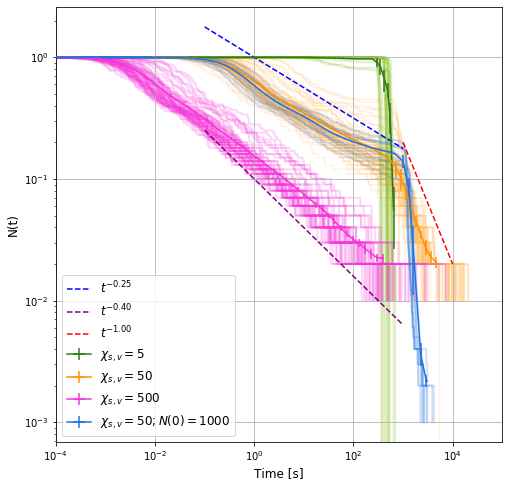

In [15]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')

plt.xlim(1e-4, 1e5)

start, end = 20, -1    
for k in dat5.keys() :
    plt.plot(dat5[k][:, 0], dat5[k][:, 1]/dat5[k][0, 1], color = '#7eb60d', linewidth=2, zorder=1, alpha=0.2)
plt.errorbar(B_avg5[:, 0], B_avg5[:, 1]/B_avg5[0, 1], xerr = B_std5[:, 0], yerr = B_std5[:, 1]/B_avg5[0, 1], color = '#2d7917', zorder=10, label = r'$\chi_{s,v}=5$')

for k in dat50.keys() :
    plt.plot(dat50[k][start:end, 0], dat50[k][start:end, 1]/dat50[k][0, 1], alpha=0.2, zorder=0, color = '#FFBD64')
plt.errorbar(B_avg50[:, 0], B_avg50[:, 1]/B_avg50[0, 1], xerr = B_std50[:, 0], yerr = B_std50[:, 1]/B_avg50[0, 1], color = '#fb9303', zorder=10, label = r'$\chi_{s,v}=50$')

for k in dat500.keys() :
    plt.plot(dat500[k][:, 0], dat500[k][:, 1]/dat500[k][0, 1], color = '#F634DA', linewidth=2, zorder=1, alpha=0.2)
plt.errorbar(B_avg500[:, 0], B_avg500[:, 1]/B_avg500[0, 1], xerr = B_std500[:, 0], yerr = B_std500[:, 1]/B_avg500[0, 1], color = '#F634DA', zorder=10, label = r'$\chi_{s,v}=500$')


#plt.plot(dat1000[:, 0], dat1000[:, 1]/dat1000[0, 1], color = 'k', label = r'$N_0=10^3$', linewidth=2, zorder=1)
for k in dat1000.keys() :
    plt.plot(dat1000[k][:, 0], dat1000[k][:, 1]/dat1000[k][0, 1], color = '#2372DD', linewidth=2, zorder=1, alpha=0.2)
plt.plot(dat1000_indiv[:, 0], dat1000_indiv[:, 1]/dat1000_indiv[0, 1], color = '#2372DD', linewidth=2, zorder=1, alpha=0.2)
plt.errorbar(B_avg1000[:, 0], B_avg1000[:, 1]/B_avg1000[0, 1], xerr = B_std1000[:, 0], yerr = B_std1000[:, 1]/B_avg1000[0, 1], color = '#2372DD', zorder=10, label = r'$\chi_{s,v}=50 ; N(0)=1000$')




t = np.logspace(-1, 3, 101)
kappa_14, alpha_14 = 1., -1./4.
plt.plot(t, kappa_14*t**alpha_14, linestyle='--', color = 'b', label=r'$t^{'+"{:10.2f}".format(alpha_14)+'}$')

t = np.logspace(-1, 3, 101)
kappa_25, alpha_25 = .1, -2./5.
plt.plot(t, kappa_25*t**alpha_25, linestyle='--', color = 'purple', label=r'$t^{'+"{:10.2f}".format(alpha_25)+'}$')

t = np.logspace(3, 4, 101)
kappa_x, alpha_x = 200., -1.
plt.plot(t, kappa_x*t**alpha_x, linestyle='--', color = 'r', label=r'$t^{'+"{:10.2f}".format(alpha_x)+'}$')

plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('N(t)', fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# $\ell(t)$

In [33]:
ell_dat = {}
#nmax = 1
for elem in os.listdir(folder) :
    if elem != '.DS_Store' and elem.startswith('N100_') and not elem.startswith('N100_007'):
        print(elem[-2:], end='\r')
        ell_dat[elem[-2:]] = np.genfromtxt(os.path.join(folder, elem, 'sim_ell_avg.dat'))
        #nmax = np.max([nmax, len(dat[elem[-2:]])])
    



In [31]:
ell_dat5 = {}
#nmax = 1
for elem in os.listdir(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N100')) :
    if elem != '.DS_Store' and elem.startswith('out') :
        print(elem[-2:], end='\r')
        ell_dat5[elem[-2:]] = np.genfromtxt(os.path.join(main_dir, '_data/hydrosmotic_hydraulic/N100', elem, 'sim_ell_avg.dat'))
        #nmax = np.max([nmax, len(dat[elem[-2:]])])
    




In [34]:
wmin, wmax = -2, 3.5
nwindow = 100

window = np.logspace(wmin, wmax, nwindow)
time = np.cumsum(window)


ell_dat_batch_list = []
for k in ell_dat.keys() :
    ell_dat_batch_list += [batch_window(ell_dat[k], wmin=wmin, wmax=wmax, nwindow=nwindow)]
    print(k, end='\r')
print('End of import !')
ell_B_avg, ell_B_std = batch_average(ell_dat_batch_list)

End of import !


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


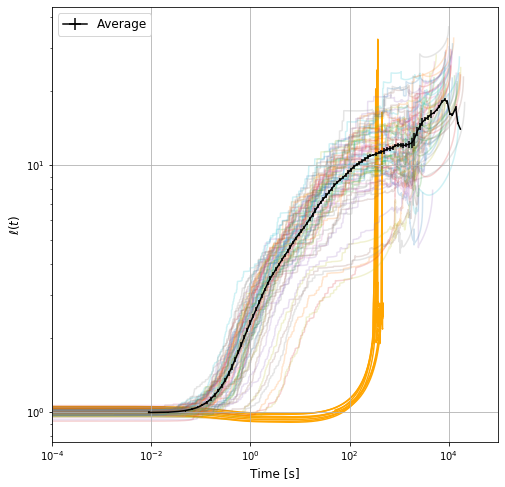

In [40]:
plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e-4, 1e5)

for k in ell_dat5.keys() :
    plt.plot(ell_dat5[k][start:end, 0], ell_dat5[k][start:end, 1], color='orange', zorder=0)

start, end = 20, -1
for k in ell_dat.keys() :
    plt.plot(ell_dat[k][start:end, 0], ell_dat[k][start:end, 1], alpha=0.2, zorder=0)

plt.errorbar(ell_B_avg[:, 0], ell_B_avg[:, 1], xerr = ell_B_std[:, 0], yerr = ell_B_std[:, 1], color = 'k', zorder=10, label='Average')

plt.xlabel('Time [s]', fontsize=12)
plt.ylabel(r'$\ell(t)$', fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# Hydraulic

In [7]:
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
data_dir = ''

In [8]:


path = os.path.join(main_dir, data_dir, 'run0001')

conf, ch = chain.load_config(os.path.join(path, 'config.conf'))

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'))
elif ch.lumen_type == 'hydraulic' :
    L, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic = False)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

show_chain = 1
if show_chain :
    print(ch)
    x = np.linspace(0, ch.total_length, 1001)
    tools.plot_profile(x, ch, centers=0, lw=1.5, show=True)

KeyboardInterrupt: 

In [9]:
#savename_ns = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')
x_log=1
y_log=0
show_totalarea=1

if ch.lumen_type == 'hydroosmotic' :
    tools.plot_evolution(L, nions, ell, savename='', show_totalarea=False, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))
else :
    tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=False, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(10, 7))




NameError: name 'L' is not defined

In [10]:
Nt_hydrau = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/out_hydrau/sim_nlum.dat')
Nt_hydrauN100 = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/out_hydrauN100/sim_nlum.dat')

Nt_hydro  = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/out_hydro/sim_nlum.dat')
Nt_hydro3  = np.loadtxt('/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/out_hydro3/sim_nlum.dat')



In [11]:
Nt_list = {}
for i in range(0, 50) :
    filename = os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/sim_nlum'+str(i).zfill(2)+'.dat')
    Nt_list[i] = np.loadtxt(filename)
    

In [ ]:

plt.xscale('log')
plt.yscale('log')

start, stop = 10, -1

#plt.plot(Nt_hydro[:, 0], Nt_hydro[:, 1]/Nt_hydro[0, 1])
#plt.plot(Nt_hydro3[:, 0], Nt_hydro3[:, 1]/Nt_hydro3[0, 1])

#for k in dat500.keys() :
#    plt.plot(dat500[k][start:stop, 0], dat500[k][start:stop, 1]/dat500[k][0, 1], color = '#8621FF', linewidth=2, zorder=1, alpha=0.2)

for i in range(0, 50) :
    plt.plot(Nt_list[i][start:stop, 0], Nt_list[i][start:stop, 1]/Nt_list[i][0, 1], alpha=0.1, color = '#3070FF')


plt.plot(Nt_hydrau[start:stop, 0], Nt_hydrau[start:stop, 1]/Nt_hydrau[0, 1], color='#FFC100')
plt.plot(Nt_hydrauN100[start:stop, 0], Nt_hydrauN100[start:stop, 1]/Nt_hydrauN100[0,1], color='#30A100')
    
t_hydrau = np.logspace(0, 15, 101)
kappa, alpha = 2, -1./6
plt.plot(t_hydrau, kappa*t_hydrau**alpha, color = 'k', label = r'$'+str(kappa)+'t^{'+"{:10.2f}".format(alpha)+'}$')

t_hydrau1 = np.logspace(1, 3, 101)
kappa1, alpha1 = 2, -1./4
plt.plot(t_hydrau1, kappa1*t_hydrau1**alpha1, color = 'b', label = r'$'+str(kappa1)+'t^{'+"{:10.2f}".format(alpha1)+'}$')

t_hydrau2 = np.logspace(-3, 3, 101)
kappa2, alpha2 = 2e-1, -0.33
plt.plot(t_hydrau2, kappa2*t_hydrau2**alpha2, color = 'r', label = r'$'+str(kappa2)+'t^{'+"{:10.2f}".format(alpha2)+'}$')
plt.legend(fontsize=12)

